## Observations and Insights 

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [53]:
# Checking the number of mice.
mouse_count = mouse_data["Mouse ID"].count()
unique_mouse_count = mouse_data["Mouse ID"].nunique()
print(f"The total record count is {mouse_count} and the number of mice is {unique_mouse_count}.")

The total record count is 1893 and the number of mice is 249.


In [54]:
mouse_data1 = mouse_data.copy()
mouse_data1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
mouse_data_sorted = mouse_data1.sort_values(["Mouse ID", "Timepoint"])


In [55]:
mouse_data2 = mouse_data.copy()
mouse_data2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
idtimes = mouse_data2["Mouse ID"]
dup_mouse = mouse_data2.loc[mouse_data2.duplicated(["Mouse ID", "Timepoint"],)]
#mouse_data2[idtimes.isin(idtimes[idtimes.duplicated()])].sort_values("Mouse ID")
#mouse_dups = []
#for x in range(len(mouse_data2["Mouse ID"])):
    #x = mouse_data2.loc[mouse_data2.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
    #mouse_dups.append(x)
#mouse_dups

In [40]:
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
mouse_data3 = mouse_data.copy()
more_mouse_data = mouse_data2.loc[mouse_data2.duplicated(subset=['Mouse ID','Timepoint'])]
more_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [89]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseid = mouse_data2.loc[mouse_data2.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
#clean_mouse = mouse_data2.drop(mouse_data2.loc[mouse_data2.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'])
#clean_mouse
#makeitastring = ''.join(map(str, mouseid))
mousey, = mouseid

In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_data3.set_index("Mouse ID")
#clean_mouse = mouse_data3.drop_duplicates(mouseid)
mice = mouse_data3[mouse_data3['Mouse ID'].isin(mouseid)==False]

In [100]:
# Checking the number of mice in the clean DataFrame.
checkthemice = mice["Mouse ID"].nunique()
checkthemice

248

## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumormean = mice["Tumor Volume (mm3)"].mean()
tumormedian = mice["Tumor Volume (mm3)"].median()
tumorvar = mice["Tumor Volume (mm3)"].var()
tumorstd = mice["Tumor Volume (mm3)"].std()
tumorsem = mice["Tumor Volume (mm3)"].sem()
print(f"Mean: {tumormean}\nMedian: {tumormedian}\nVariance: {tumorvar}\nStardard Deviation: {tumorstd}\nSEM: {tumorsem}")


Mean: 50.435293232255326
Median: 48.933453655
Variance: 79.46290714557298
Stardard Deviation: 8.914196943391648
SEM: 0.2055906218698623


In [118]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumordata = tumormice.groupby("Drug Regimen").describe()["Tumor Volume (mm3)"]
tumordata

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [147]:
tumormice = mice[["Drug Regimen", "Mouse ID"]]
tumormice1 = tumormice.drop_duplicates()
tumormice2 = tumormice1["Drug Regimen"].value_counts()

In [148]:
tumormice2

Naftisol     25
Infubinol    25
Ceftamin     25
Placebo      25
Ramicane     25
Ketapril     25
Capomulin    25
Zoniferol    25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

In [140]:
firstbardata = tumormice1.groupby("Drug Regimen")
firstbardata


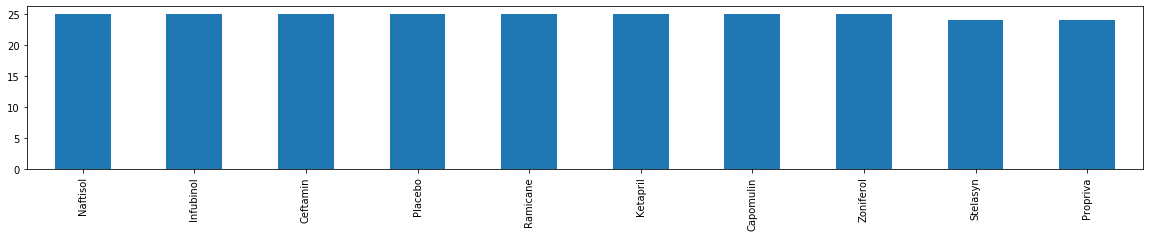

In [149]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
firstbar = tumormice2.plot(kind="bar", figsize=(20,3))
plt.show()



In [155]:
tumorx = tumormice1["Drug Regimen"].unique()
tumory = 
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [156]:
tumorx

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [157]:
micesex = mice["Sex"].value_counts()

# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
